In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion
%pylab inline
import scipy as sp
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
sp.stats.norm.cdf(0,loc = 75,)

0.0

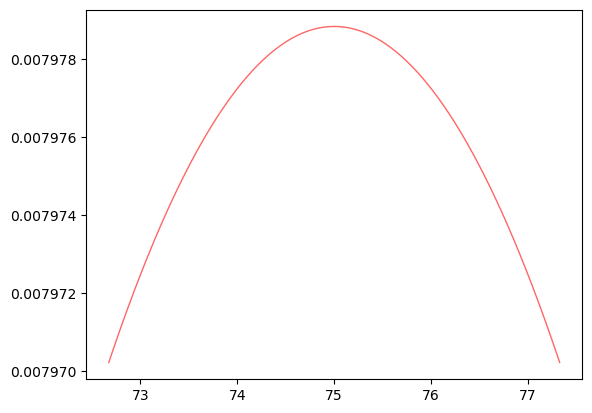

In [13]:
x = np.linspace(sp.stats.norm.ppf(0.01,loc = 75,scale = 1),
                sp.stats.norm.ppf(0.99,loc = 75,scale = 1), 100)
plt.plot(x, sp.stats.norm.pdf(x,loc = 75,scale = 50),
       'r-', lw=1, alpha=0.6, label='norm pdf')

In [19]:
n = 100
F_H0 = sp.stats.binom(n, 0.75)

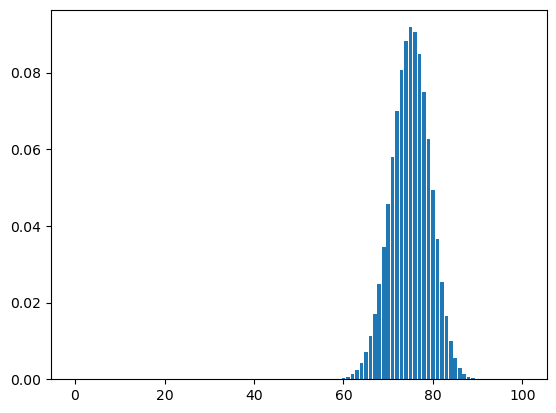

In [34]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.show()

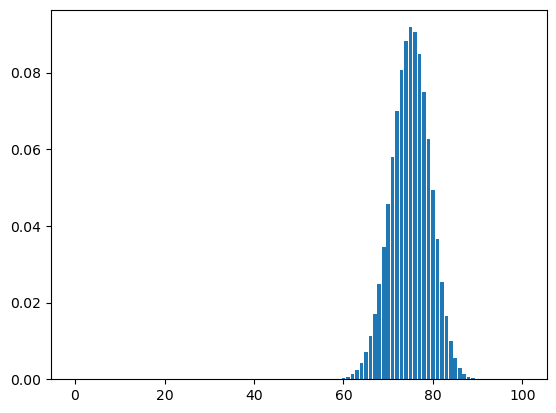

In [35]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
pylab.show()

In [44]:
sp.stats.binomtest(67, 100, 0.75, alternative = 'two-sided').pvalue

0.08222258891386612

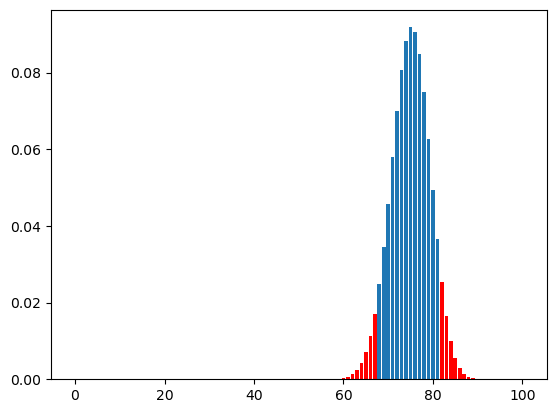

In [45]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(0,67,68), F_H0.pmf(np.linspace(0,67,68)), align = 'center', color='red')
pylab.bar(np.linspace(82,100,19), F_H0.pmf(np.linspace(82,100,19)), align = 'center', color='red')

pylab.show()

In [46]:
sp.stats.binomtest(22, 50, 0.75, alternative = 'two-sided').pvalue

3.483147897830022e-06

In [53]:
data = pd.read_csv('pines.txt',sep='\t')

In [56]:
data.to_numpy()

array([[200. ,   8.8],
       [199.3,  10. ],
       [193.6,  22.4],
       ...,
       [156.7, 155.3],
       [154.1, 150.8],
       [ 87.7, 200. ]])

In [59]:
data.to_numpy()[:,1]

array([  8.8,  10. ,  22.4,  35.6,  45.4,  47.2,  48.8,  42.1,  29. ,
        33.6,  35.8,  38.7,  42.8,  36.2,  45.8,  25.4,  25.4,  28.3,
        36.9,  14.3,  13.1,   8.1,   9.3,   9.1,  14.7,  29.7,  45.8,
        44.2,  49.4,  49.6,  10.8,   0. ,   5.4,   5.5,   3.9,   8.5,
        11.3,  11. ,   9.2,  12.6,  21.4,  39.8,  18.2,  46.9,  46.9,
        47.9,  50. ,  47.9,  47.9,  50.7,  45.2,  35. ,  35.5,  44.8,
        43.4,  40.2,  34.3,  33.3,  29.8,  38.9,  61.2,  52.2,  67.8,
        73.8,  80.9,  78. ,  94.8,  90.4,  84. ,  64.3,  67.7,  71.5,
        78.3,  81.6,  83.8,  84.1,  84.7,  89.4,  90.6,  99.5,  98.4,
        97.3,  91.2,  96.2,  98.6, 100. ,  99.1, 100. ,  96.2,  90.6,
        61.5,  69.5,  59.7,  71.5,  86.3,  78.9,  53.1,  72.1,  74. ,
        67.1,  64.7,  59.8,  73.2,  69.8,  65.9,  79.2,  62.5,  62.9,
        60.4,  69.3,  69.2,  68.2,  54.6,  51.5,  73.8,  73. ,  86.2,
        73.4,  70.7,  72.7,  27.7,  28.7,  16.8,  25.3,  29. ,  35.1,
        36.3,  28.1,

In [92]:
from scipy.stats import binned_statistic_2d

xbins = np.arange(0,201,40)
ybins = np.arange(0,201,40)
mas = data.shape
ret = binned_statistic_2d(data.to_numpy()[:,0],data.to_numpy()[:,1],np.ones(data.shape[0]),'count',bins=(xbins,ybins))

In [94]:
ret.statistic.sum()/25

23.36

In [96]:
ravn = np.full((5,5),23.36)

In [107]:
ravn.flatten()

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

In [104]:
ret.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [108]:
sp.stats.chisquare(ret.statistic.flatten(),ravn.flatten())

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [147]:
mas = sp.stats.binom(23,0.5).pmf(np.arange(24))
mas

array([1.19209290e-07, 2.74181366e-06, 3.01599503e-05, 2.11119652e-04,
       1.05559826e-03, 4.01127338e-03, 1.20338202e-02, 2.92249918e-02,
       5.84499836e-02, 9.74166393e-02, 1.36383295e-01, 1.61180258e-01,
       1.61180258e-01, 1.36383295e-01, 9.74166393e-02, 5.84499836e-02,
       2.92249918e-02, 1.20338202e-02, 4.01127338e-03, 1.05559826e-03,
       2.11119652e-04, 3.01599503e-05, 2.74181366e-06, 1.19209290e-07])

<Axes: >

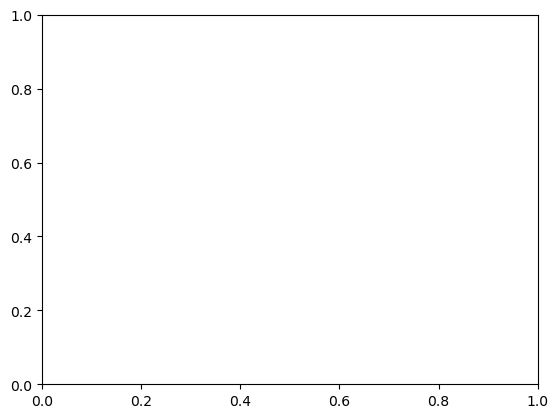

In [160]:
axs = plt.subplot()
axs

In [161]:
axs.xticks(np.arange(24))
axs.bar(np.arange(24),mas)

AttributeError: 'Axes' object has no attribute 'xticks'

In [162]:
axs.bar(np.arange(24),mas)

<BarContainer object of 24 artists>

In [163]:
axs.show()

AttributeError: 'Axes' object has no attribute 'show'